<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week7/Clustering_K_means_solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as skl

## Food nutrient content

In [3]:
food = pd.read_csv('https://think.cs.vt.edu/corgis/datasets/csv/food/food.csv')

In [39]:
mcg = ['Data.Alpha Carotene',
'Data.Beta Carotene',
'Data.Beta Cryptoxanthin',
'Data.Lutein and Zeaxanthin',
'Data.Lycopene',
'Data.Retinol',
'Data.Selenium',
'Data.Vitamins.Vitamin A - RAE',
'Data.Vitamins.Vitamin B12',
'Data.Vitamins.Vitamin K']



mg = ['Data.Cholesterol',
'Data.Choline',
'Data.Niacin',
'Data.Riboflavin',
'Data.Thiamin',
'Data.Major Minerals.Calcium',
'Data.Major Minerals.Copper',
'Data.Major Minerals.Iron',
'Data.Major Minerals.Magnesium',
'Data.Major Minerals.Phosphorus',
'Data.Major Minerals.Potassium',
'Data.Major Minerals.Sodium',
'Data.Major Minerals.Zinc',
'Data.Vitamins.Vitamin B6',
'Data.Vitamins.Vitamin C',
'Data.Vitamins.Vitamin E']

food_ML[mg] = food_ML[mg] / 1000
food_ML[mcg] = food_ML[mcg] / 1000000

In [40]:
food_ML = food.drop(columns = ['Category', 'Description' , 'Nutrient Data Bank Number'])
# food_ML = skl.preprocessing.scale(food_ML, axis=0)  ### WHAT HAPPENS IF WE STANDARDIZE?


### Cluster

In [13]:
Nclust = 3
from sklearn import cluster
foodclustersKM = cluster.KMeans(n_clusters=Nclust).fit(food_ML)


In [14]:
food['Cluster'] = foodclustersKM.labels_

### Verify the clusters

In [ ]:
food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water', 'Cluster']]

,Data.Protein,Data.Carbohydrate,Data.Fat.Total Lipid,Data.Fiber,Data.Water,Cluster
0,1.03,6.89,4.38,0.0,87.50,0
1,3.34,4.87,1.99,0.0,89.04,0
2,3.28,4.67,3.20,0.0,88.10,0
3,3.10,4.46,3.46,0.0,88.20,0
4,3.28,4.67,3.20,0.0,88.10,0
...,...,...,...,...,...,...
7078,1.11,5.48,0.23,1.6,92.57,0
7079,3.46,4.81,0.38,1.4,90.37,0
7080,1.81,11.60,0.19,2.2,85.59,0
7081,1.34,17.14,22.85,0.6,55.97,2


In [ ]:
food['Cluster'].value_counts()

0    3996
2    2048
1    1039
Name: Cluster, dtype: int64

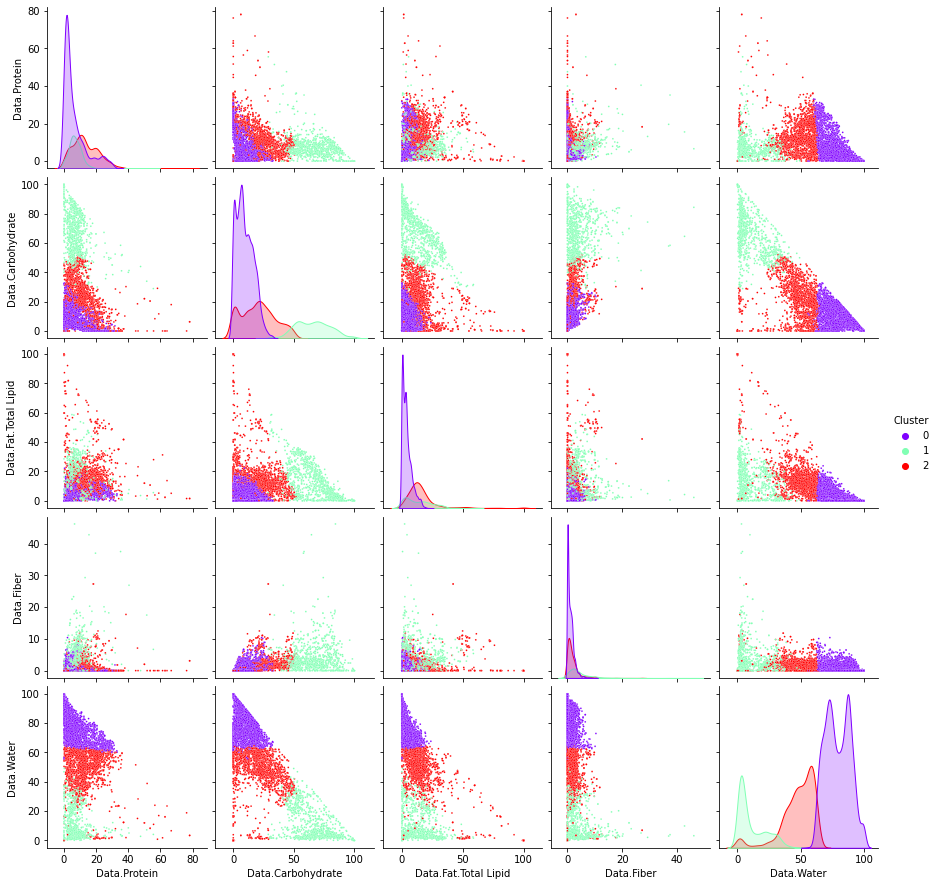

In [ ]:
data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','Cluster']]
sns.pairplot(data, hue='Cluster', palette="rainbow", plot_kws={"s": 3})

### Exercise

Choose the most representative scatterplot/histplot to show how the three clusters differ (with new scatterplots/histplot).

Any guesses on which are the food categories?

In [24]:
food.head()

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Major Minerals.Sodium,Data.Major Minerals.Zinc,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster,Cluster_n4
0,Milk,"Milk, human",11000000,0,7,0,6.89,14,16.0,0.0,...,17,0.17,61,0.05,0.011,5.0,0.08,0.3,1,3
1,Milk,"Milk, NFS",11100000,0,4,0,4.87,8,17.9,0.0,...,39,0.42,59,0.56,0.060,0.1,0.03,0.2,1,3
2,Milk,"Milk, whole",11111000,0,7,0,4.67,12,17.8,0.0,...,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1,3
3,Milk,"Milk, low sodium, whole",11111100,0,7,0,4.46,14,16.0,0.0,...,3,0.38,29,0.36,0.034,0.9,0.08,0.3,1,3
4,Milk,"Milk, calcium fortified, whole",11111150,0,7,0,4.67,12,17.8,0.0,...,38,0.41,32,0.54,0.061,0.0,0.05,0.3,1,3


In [9]:
food[food['Cluster'] == 0 ]['Category'].value_counts().head(20)

Cookie                              100
Bread                                61
Crackers                             51
Pretzels                             40
Popcorn                              33
Cake or cupcake                      30
Potato chips                         27
Cake                                 21
Cereal                               19
Roll                                 19
Pie                                  13
Muffin                               12
Doughnut                             12
Cereal or granola bar                12
Fudge                                11
Coffee                               11
Tortilla chips                       10
Chocolate                             8
Peanut butter and jelly sandwich      8
Bagel                                 6
Name: Category, dtype: int64

In [10]:
food[food['Cluster'] == 1 ]['Category'].value_counts().head(20)

Infant formula                 173
Rice                           135
Potato                          82
Egg omelet or scrambled egg     82
Coffee                          80
Chocolate milk                  51
Beef                            50
Pasta                           44
Oatmeal                         44
Chicken or turkey               43
Tea                             39
Yogurt                          34
Turkey                          29
Soft drink                      27
Carrots                         26
Chicken                         25
Milk                            25
Sweet potato                    25
Corn                            24
Grits                           24
Name: Category, dtype: int64

In [11]:
food[food['Cluster'] == 2 ]['Category'].value_counts().head(20)

Frankfurter or hot dog sandwich    95
Pie                                65
Bread                              58
Cheese                             43
Pizza                              39
Cheese sandwich                    37
Beef                               27
Pancakes                           24
Potato                             23
Muffin                             21
Pork                               20
Chicken                            19
Pork chop                          19
Egg                                19
Chicken thigh                      18
Roll                               18
Waffle                             18
Beef steak                         17
Turnover                           15
Chicken fillet sandwich            15
Name: Category, dtype: int64

What happens if you scale the data before clustering?

In [25]:
food_ML_scaled = skl.preprocessing.scale(food_ML, axis=0)  ### WHAT HAPPENS IF WE STANDARDIZE?

In [26]:
foodclustersKM_scaled = cluster.KMeans(n_clusters=Nclust).fit(food_ML_scaled)
food['Cluster_scaled'] = foodclustersKM_scaled.labels_

In [28]:
food['Cluster_scaled'].value_counts()

1    3896
2    1976
3    1038
0     173
Name: Cluster_scaled, dtype: int64

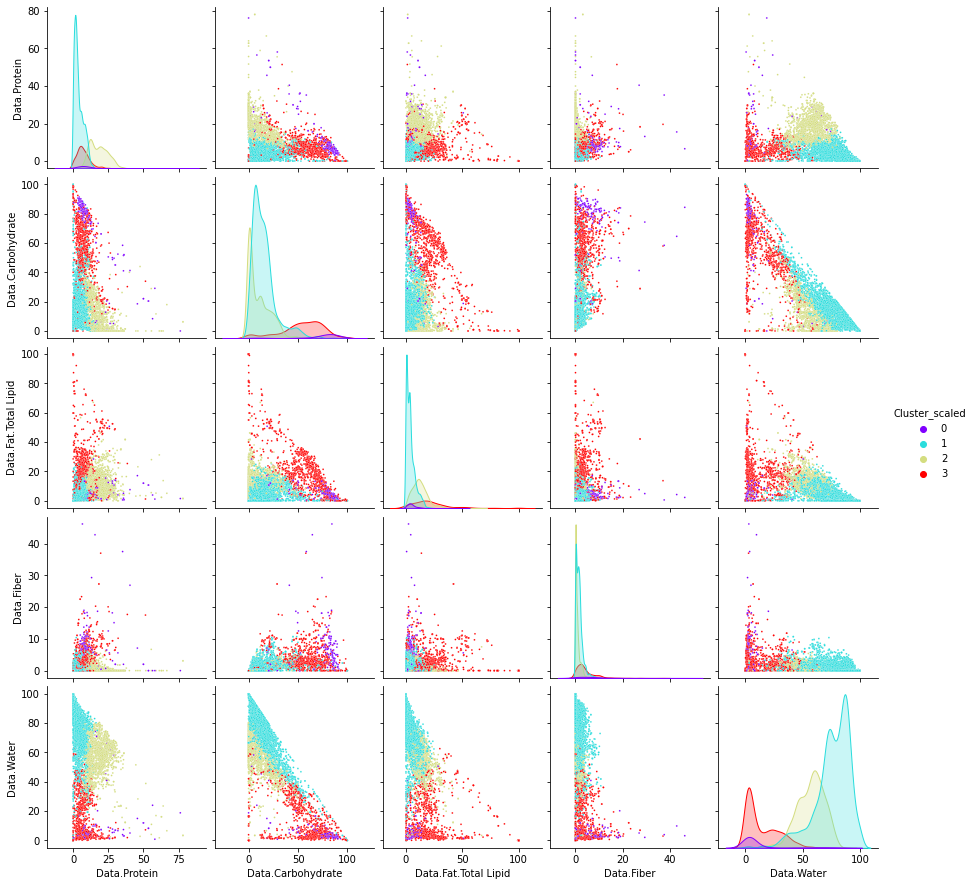

In [27]:
data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','Cluster_scaled']]
sns.pairplot(data, hue='Cluster_scaled', palette="rainbow", plot_kws={"s": 3})

In [32]:
food[food['Cluster_scaled'] == 3 ]['Category'].value_counts().head(20)

Cookie                              98
Crackers                            49
Bread                               46
Popcorn                             33
Cake or cupcake                     30
Potato chips                        27
Pie                                 27
Pretzels                            24
Cake                                15
Peanut butter and jelly sandwich    14
Doughnut                            12
Muffin                              12
Cereal or granola bar               12
Peanuts                             12
Fudge                               11
Coffee                              11
Tortilla chips                      10
Almonds                             10
Waffle                              10
Chocolate                            8
Name: Category, dtype: int64

What happens if you cluster not based on macroelements mainly (Carbs, fats, proteins, water, but based on selected micronutrients). Try clustering only on micronutrients (determine the most appropriate number of clusters, then show the clustering results and take a guess on what the clusters represent). Cluster separately for vitamins/other micronutrients and for trace minerals.

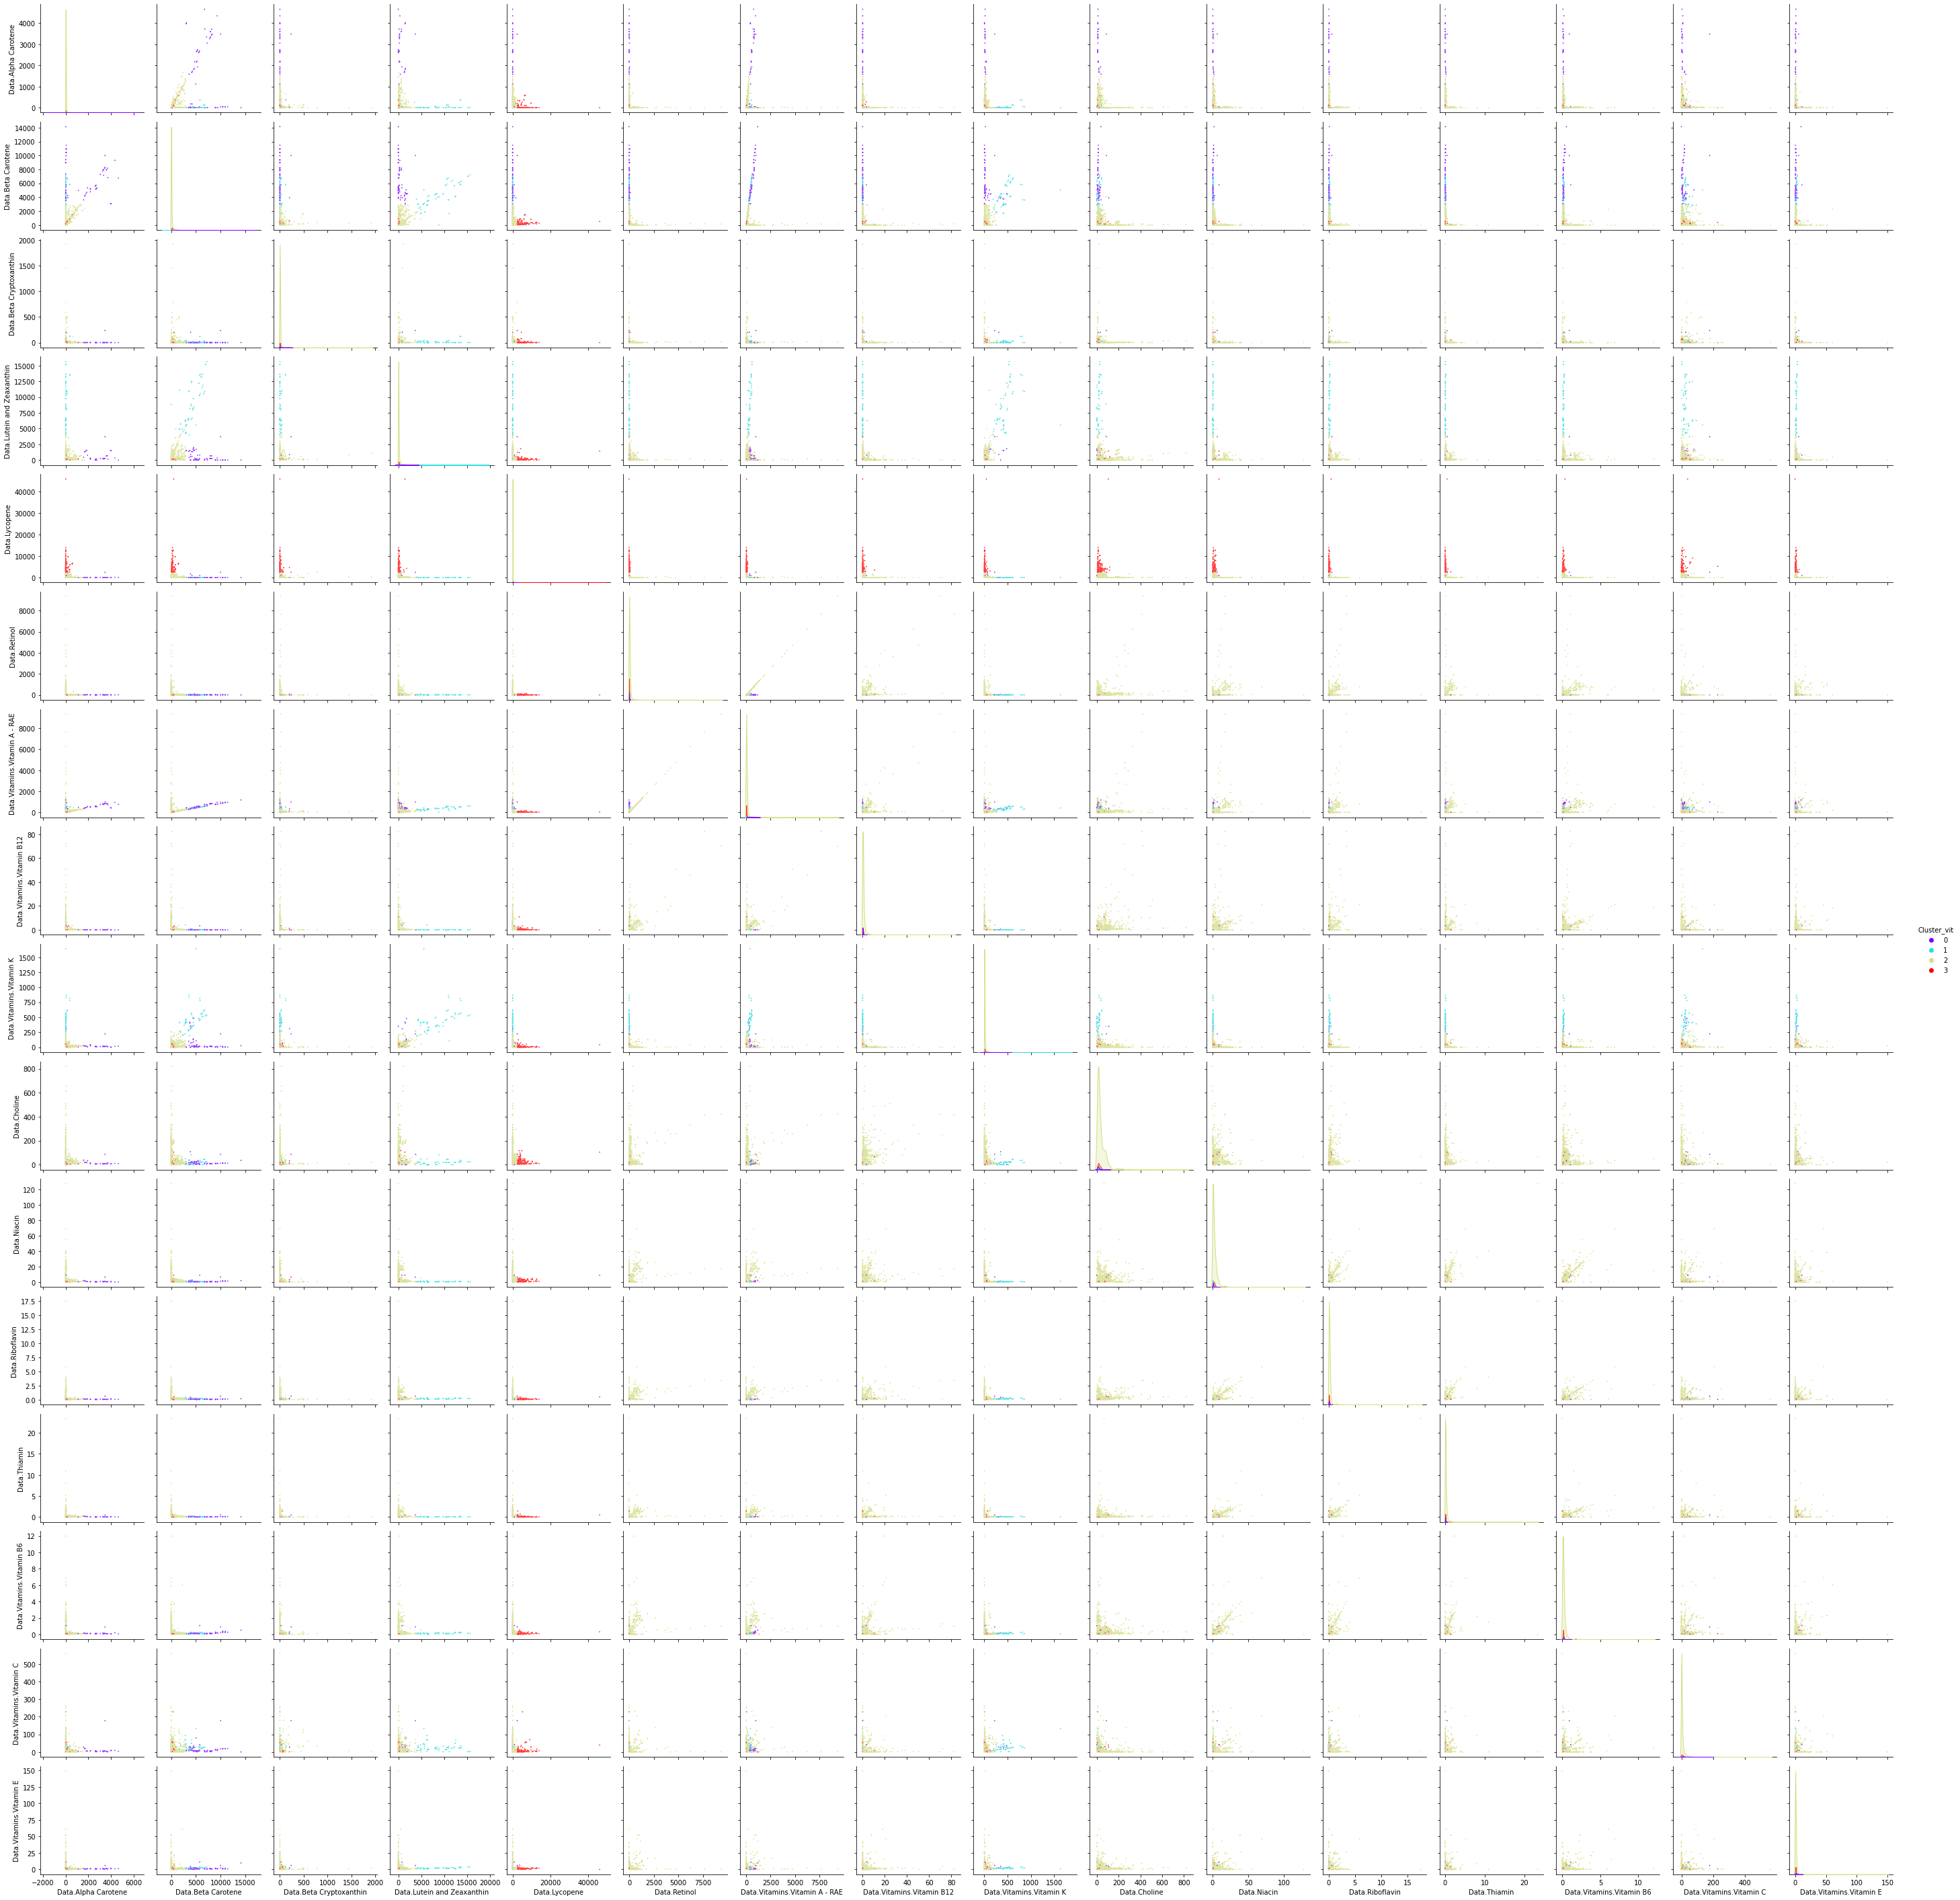

In [34]:
vitamin = ['Data.Alpha Carotene',
'Data.Beta Carotene',
'Data.Beta Cryptoxanthin',
'Data.Lutein and Zeaxanthin',
'Data.Lycopene',
'Data.Retinol',
'Data.Vitamins.Vitamin A - RAE',
'Data.Vitamins.Vitamin B12',
'Data.Vitamins.Vitamin K',
'Data.Choline',
'Data.Niacin',
'Data.Riboflavin',
'Data.Thiamin',
'Data.Vitamins.Vitamin B6',
'Data.Vitamins.Vitamin C',
'Data.Vitamins.Vitamin E']

vitamML = food[vitamin]
foodclustersKM_vits = cluster.KMeans(n_clusters=Nclust).fit(vitamML)
food['Cluster_vit'] = foodclustersKM_vits.labels_
data = food[vitamin + ['Cluster_vit']]

sns.pairplot(data, hue='Cluster_vit', palette="rainbow", plot_kws={"s": 3})

In [38]:
# Example: cluster 3 contains Licopene-containing foods (tomato)
food[food['Cluster_vit']==3]

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster,Cluster_n4,Cluster_scaled,Cluster_vit
575,Topping from cheese pizza,Topping from cheese pizza,14620300,0,223,0,7.62,45,14.3,1.0,...,156,0.62,0.145,1.1,1.72,8.8,0,1,2,3
576,Topping from vegetable pizza,Topping from vegetable pizza,14620310,6,304,2,12.18,40,18.5,1.9,...,146,0.54,0.212,17.3,2.03,10.6,0,1,2,3
577,Topping from meat pizza,Topping from meat pizza,14620320,0,141,0,5.65,68,36.8,0.7,...,105,0.89,0.244,0.7,1.49,6.5,0,1,2,3
578,Topping from meat and vegetable pizza,Topping from meat and vegetable pizza,14620330,4,165,1,7.66,61,35.2,1.0,...,98,0.80,0.272,11.0,1.42,7.4,0,1,2,3
1660,Beef with tomato-based sauce,Beef with tomato-based sauce,27111000,0,73,1,1.58,63,84.0,0.4,...,6,1.19,0.308,2.0,0.73,1.9,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6420,Tomatoes,"Tomatoes, for use on a sandwich",89902070,101,449,0,3.89,0,6.7,1.2,...,42,0.00,0.080,13.7,0.54,7.9,1,3,1,3
6897,Bloody Mary,Bloody Mary,93301030,1,202,1,3.24,0,5.2,0.4,...,17,0.00,0.060,53.0,0.24,1.9,1,3,1,3
7067,Tomatoes,"Tomatoes, cooked, as ingredient",99997410,120,533,0,4.86,0,7.5,1.5,...,50,0.00,0.095,16.3,0.68,9.9,1,3,1,3
7078,Tomatoes as ingredient in omelet,Tomatoes as ingredient in omelet,99997802,103,464,0,5.48,0,7.4,1.6,...,43,0.00,0.104,18.2,0.60,8.8,1,3,1,3


In [41]:
# Example: cluster 0 contains beta-carotene-containing foods (orange-colored foods)
food[food['Cluster_vit']==0]

,Category,Description,Nutrient Data Bank Number,Data.Alpha Carotene,Data.Beta Carotene,Data.Beta Cryptoxanthin,Data.Carbohydrate,Data.Cholesterol,Data.Choline,Data.Fiber,...,Data.Vitamins.Vitamin A - RAE,Data.Vitamins.Vitamin B12,Data.Vitamins.Vitamin B6,Data.Vitamins.Vitamin C,Data.Vitamins.Vitamin E,Data.Vitamins.Vitamin K,Cluster,Cluster_n4,Cluster_scaled,Cluster_vit
1950,Stuffed grape leaves with beef and rice,Stuffed grape leaves with beef and rice,27315270,179,3942,2,11.32,23,22.7,3.1,...,337,0.52,0.190,9.8,2.28,70.2,0,1,1,0
1992,Stuffed grape leaves with lamb and rice,Stuffed grape leaves with lamb and rice,27330170,176,4219,2,11.91,25,27.8,3.3,...,359,0.60,0.170,8.1,2.47,76.7,0,1,1,0
3613,Pie,"Pie, sweet potato",53360000,0,4695,1,29.03,59,27.5,1.9,...,512,0.08,0.107,6.1,0.84,3.9,0,2,1,0
3756,Nutrition bar (South Beach Living High Protein...,Nutrition bar (South Beach Living High Protein...,53720610,0,3901,0,38.40,3,108.2,7.3,...,391,0.61,0.226,27.9,4.61,350.6,2,2,3,0
4548,Egg roll,"Egg roll, with beef and/or pork",58110130,1582,3633,0,27.87,13,38.2,2.0,...,368,0.14,0.163,27.7,1.14,30.3,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6255,Sweet potatoes,"Sweet potatoes, baby food, junior",76209020,0,3982,0,14.00,0,13.1,1.5,...,332,0.00,0.113,9.6,0.52,1.5,1,3,1,0
6266,Mixed vegetables,"Mixed vegetables, garden vegetables, baby food...",76407010,1117,4989,0,7.88,0,7.9,1.0,...,462,0.00,0.114,3.3,0.30,5.7,1,3,1,0
6275,Carrots and beef,"Carrots and beef, baby food, strained",76602000,3716,6813,0,5.70,8,15.9,2.6,...,723,0.30,0.100,0.8,0.65,7.4,1,3,1,0
7057,Fruit juice,"Fruit juice, acai blend",95342000,46,5784,23,12.83,0,0.0,1.2,...,485,3.40,1.100,42.1,11.11,16.7,1,3,1,0


In [16]:
# test the original data with 4 clusters --> better separation?

Nclust = 4
from sklearn import cluster
foodclustersKM = cluster.KMeans(n_clusters=Nclust).fit(food_ML)

food['Cluster_n4'] = foodclustersKM.labels_

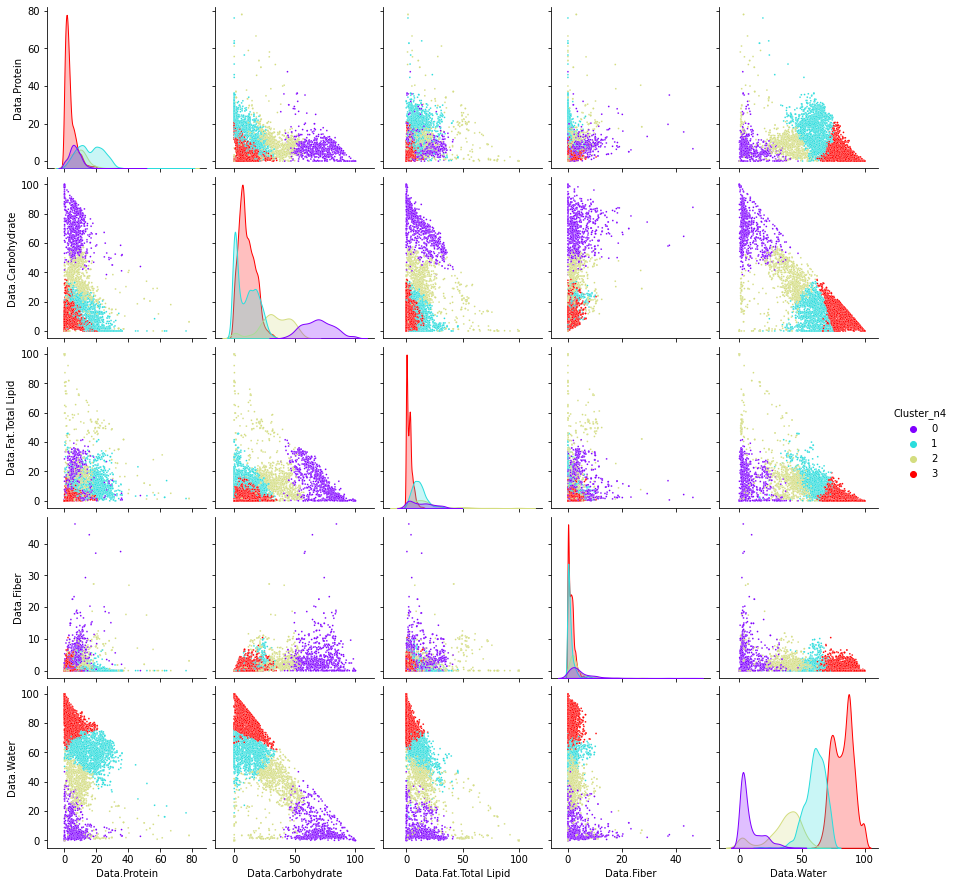

In [18]:
data = food[['Data.Protein', 'Data.Carbohydrate', 'Data.Fat.Total Lipid', 'Data.Fiber', 'Data.Water','Cluster_n4']]
sns.pairplot(data, hue='Cluster_n4', palette="rainbow", plot_kws={"s": 3})

In [19]:
food[food['Cluster_n4'] == 0 ]['Category'].value_counts().head(20)

Cookie                   98
Crackers                 50
Pretzels                 36
Popcorn                  30
Potato chips             27
Cereal                   19
Cake or cupcake          17
Cake                     15
Bread                    13
Cereal or granola bar    12
Coffee                   11
Fudge                    11
Pie                      10
Tortilla chips           10
Chocolate                 8
Doughnut                  8
Sugar substitute          6
Milk                      6
Topping                   6
Sugar                     5
Name: Category, dtype: int64

In [20]:
food[food['Cluster_n4'] == 1 ]['Category'].value_counts().head(20)

Egg omelet or scrambled egg        71
Frankfurter or hot dog sandwich    67
Cheese                             42
Beef                               39
Chicken                            38
Turkey                             34
Potato                             30
Chicken breast                     29
Chicken thigh                      29
Chicken drumstick                  27
Pasta                              26
Pork                               25
Egg                                25
Pork chop                          24
Salmon                             21
Fish                               21
Ham                                20
Trout                              18
Chicken leg                        18
Halibut                            18
Name: Category, dtype: int64

In [21]:
food[food['Cluster_n4'] == 2 ]['Category'].value_counts().head(20)

Bread                               106
Pie                                  61
Cheese sandwich                      37
Pizza                                35
Roll                                 32
Frankfurter or hot dog sandwich      28
Muffin                               28
Pancakes                             24
Waffle                               23
Peanut butter and jelly sandwich     14
Bagel                                14
Cake or cupcake                      14
Grilled cheese sandwich              13
Cake                                 13
Turnover                             12
Pizza with pepperoni                 10
Potato                               10
Ice cream cone                        9
Peanuts                               9
Chicken fillet sandwich               9
Name: Category, dtype: int64

In [22]:
food[food['Cluster_n4'] == 3 ]['Category'].value_counts().head(20)

Infant formula       173
Rice                 128
Coffee                80
Potato                65
Chocolate milk        51
Oatmeal               44
Tea                   39
Chicken or turkey     34
Beef                  34
Yogurt                34
Soft drink            27
Carrots               26
Milk                  25
Sweet potato          25
Pasta                 25
Corn                  24
Grits                 24
Green beans           22
Cream of wheat        21
Green peas            19
Name: Category, dtype: int64